In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
%matplotlib inline

In [0]:
iris = datasets.load_iris()

In [0]:
X = iris.data
y = iris.target
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

In [0]:
y_pred = kmeans_cluster.fit_predict(X_std)

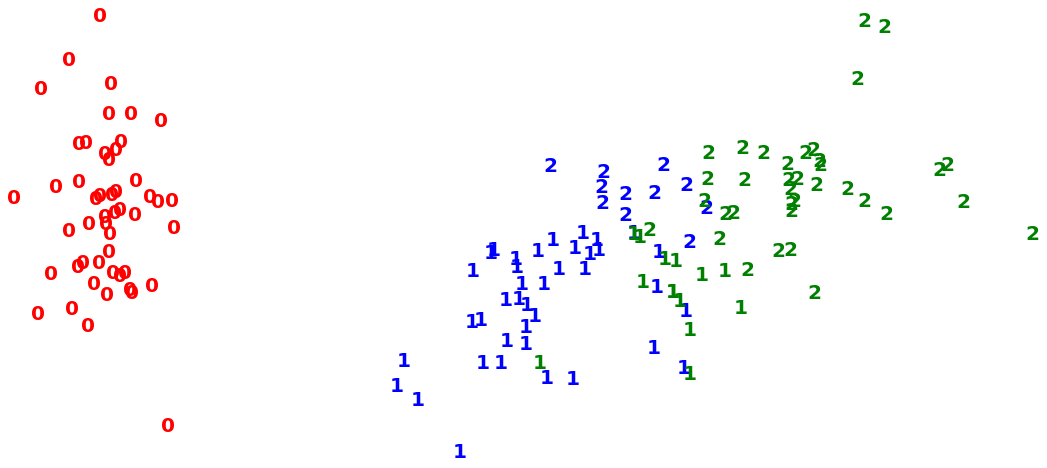

In [0]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(3, 1.5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 20}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

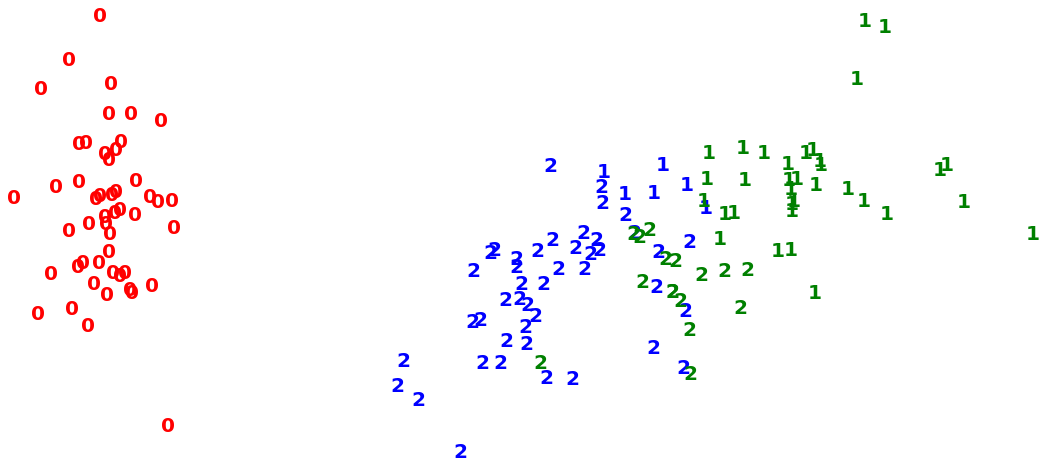

In [0]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=50)

# Fit model
minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(3, 1.5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 20}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

K=2


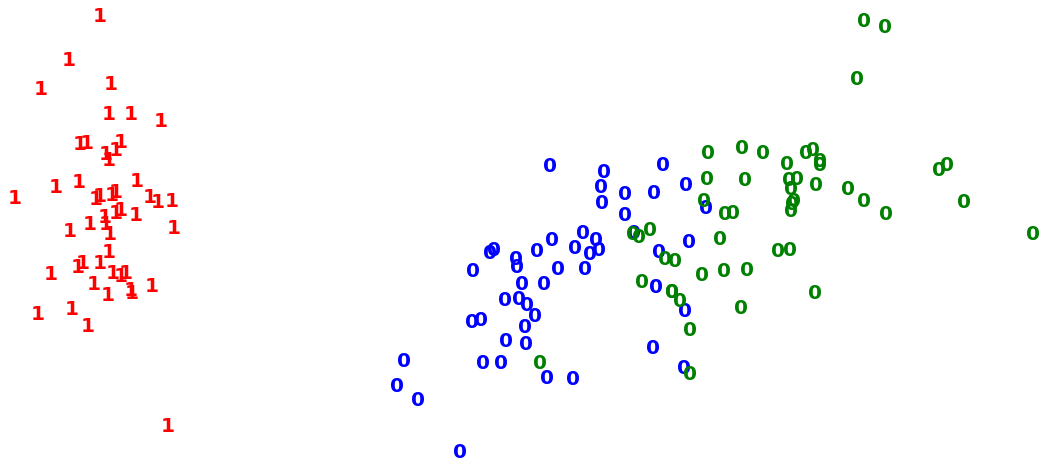

K=3


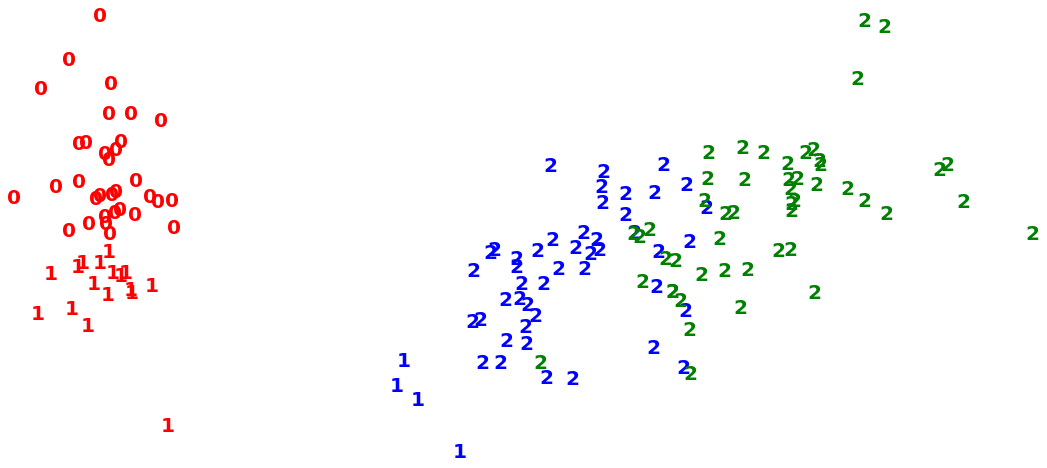

K=4


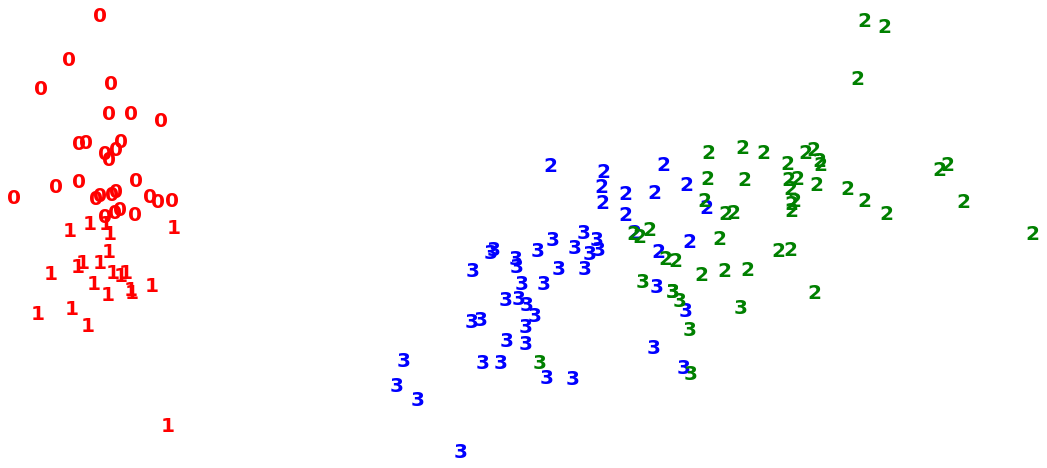

K=5


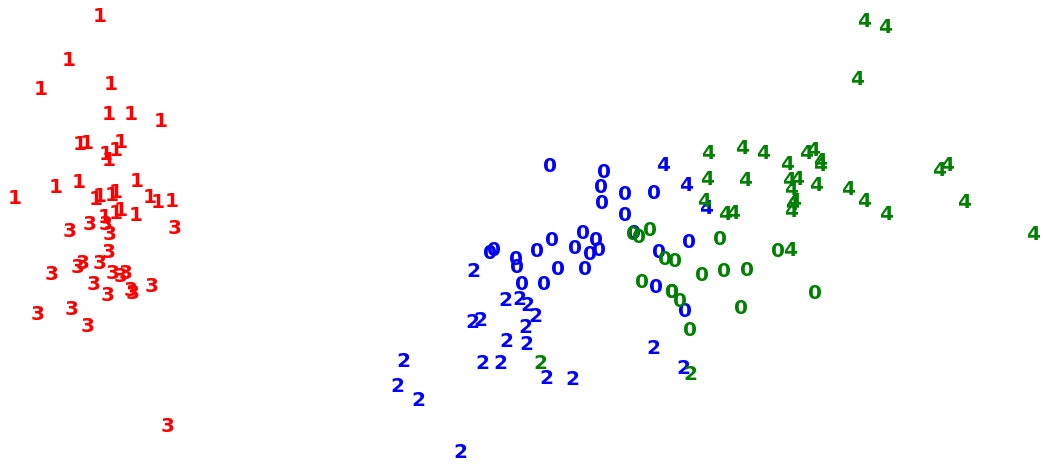

In [0]:
for k in range(2, 6, 1):
    # Defining the mini-batch k-means
  minikmeans_cluster = MiniBatchKMeans(
      init='random',
      n_clusters=k,
      batch_size=50)

  # Fit model
  minikmeans_cluster.fit(X_std)
  minikmeans_cluster = minikmeans_cluster.predict(X_std)

  plt.figure(figsize=(3, 1.5))
  colours = 'rbg'
  for i in range(pca.shape[0]):
      plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
              color=colours[y[i]],
              fontdict={'weight': 'bold', 'size': 20}
          )

  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  print('K={}'.format(k))
  plt.show()

K of two seems to make the most sense here. Mostly because two 'actual' clusters on the right are not linearly seperable. So splitting these into two looks (without knowing the correct k) like the correct number for K. Anything more than that tends to get out of hand.

In [0]:
from sqlalchemy import create_engine

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [0]:
heart_disease = engine.execute('SELECT * FROM heartdisease').fetchall()
engine.dispose()

In [0]:
heartdisease_df = pd.DataFrame(heart_disease)

In [0]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [0]:
X_std = scaler.fit_transform(X)

In [0]:
pca = PCA(n_components=2).fit_transform(X_std)

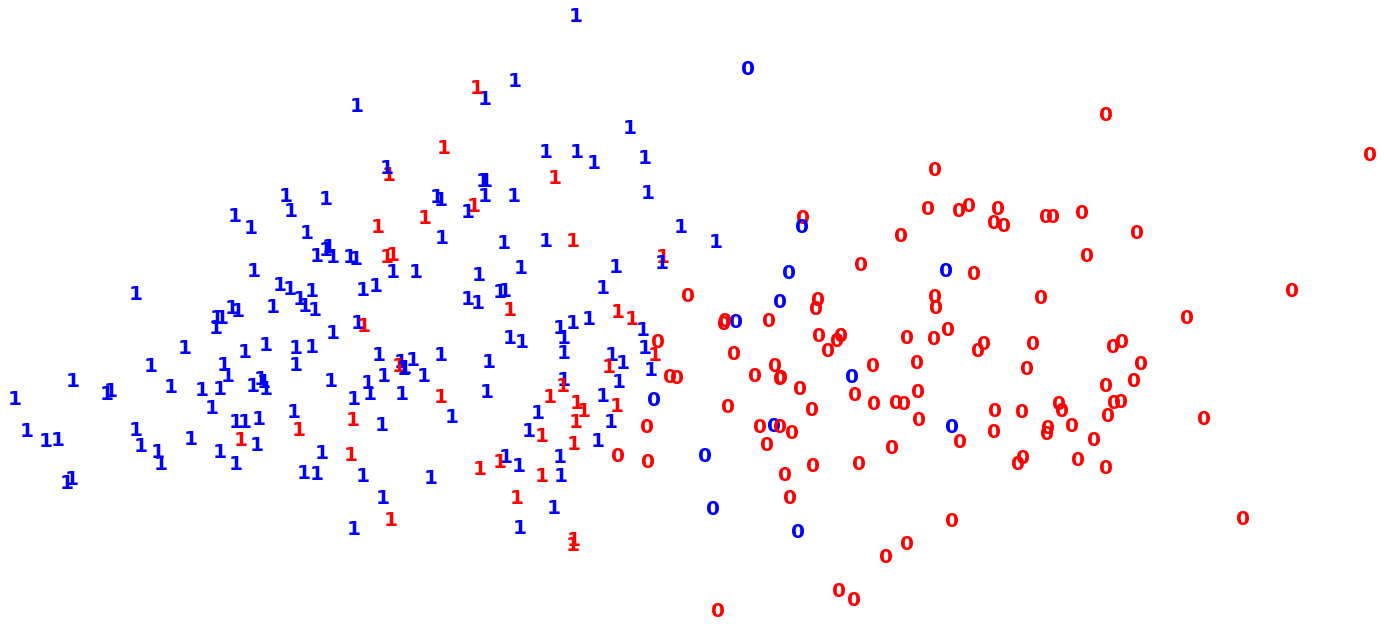

In [0]:
# Defining the mini-batch k-means
kmeans_cluster = KMeans(n_clusters=2)

# Fit model
kmeans_cluster.fit(X_std)
kmeans_cluster = kmeans_cluster.predict(X_std)

plt.figure(figsize=(3,1.5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(kmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 20}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [0]:
kmeans_cluster = KMeans(n_clusters=2)
y_pred = kmeans_cluster.fit_predict(X_std)

In [0]:
(y_pred == y).mean()

0.8316831683168316

Using simple kmeans clustering, this accurately grouped 83% of the data.